# Projeto de Estatística II


## Parte II - Regressão Logística e Hipóteses mais complexas

-------------------------------

**Instruções:**

- A segunda parte do projeto engloba a avliação dos tópicos de Regressão Logística e Hipóteses mais complexas.
- Ela deve ser entregue até o dia 05/05/2022.
- Para a entrega, salve seu notebook na pasta Projetos do nosso drive com o nome do notebook com o seguinte padrão: [primeiro nome]_[sobrenome]_projeto_estatistica_II_parteII.ipynb
- A avaliação será registrada nos notebooks em formato de comentários.
-------------------------------

1. Treine um um modelo de regressão logística para o dataset 'Pima Indians Diabetes Database' (diabetes.csv) com o objetivo de prever diagnosticamente se um paciente tem ou não diabetes. Maiores detalhes sobre o dataset podem ser encontrados [aqui](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database).

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('diabetes.csv')
df.head()

FileNotFoundError: ignored

In [ ]:
# Não temos nulos e apenas dados numéricos no df
df.info()

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


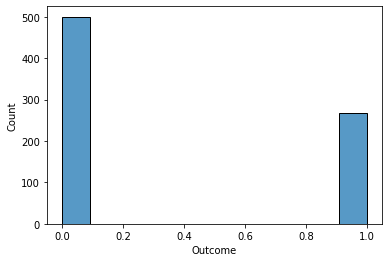

In [ ]:
# Distribuição do target não é balanceada
sns.histplot(data=df, x='Outcome');

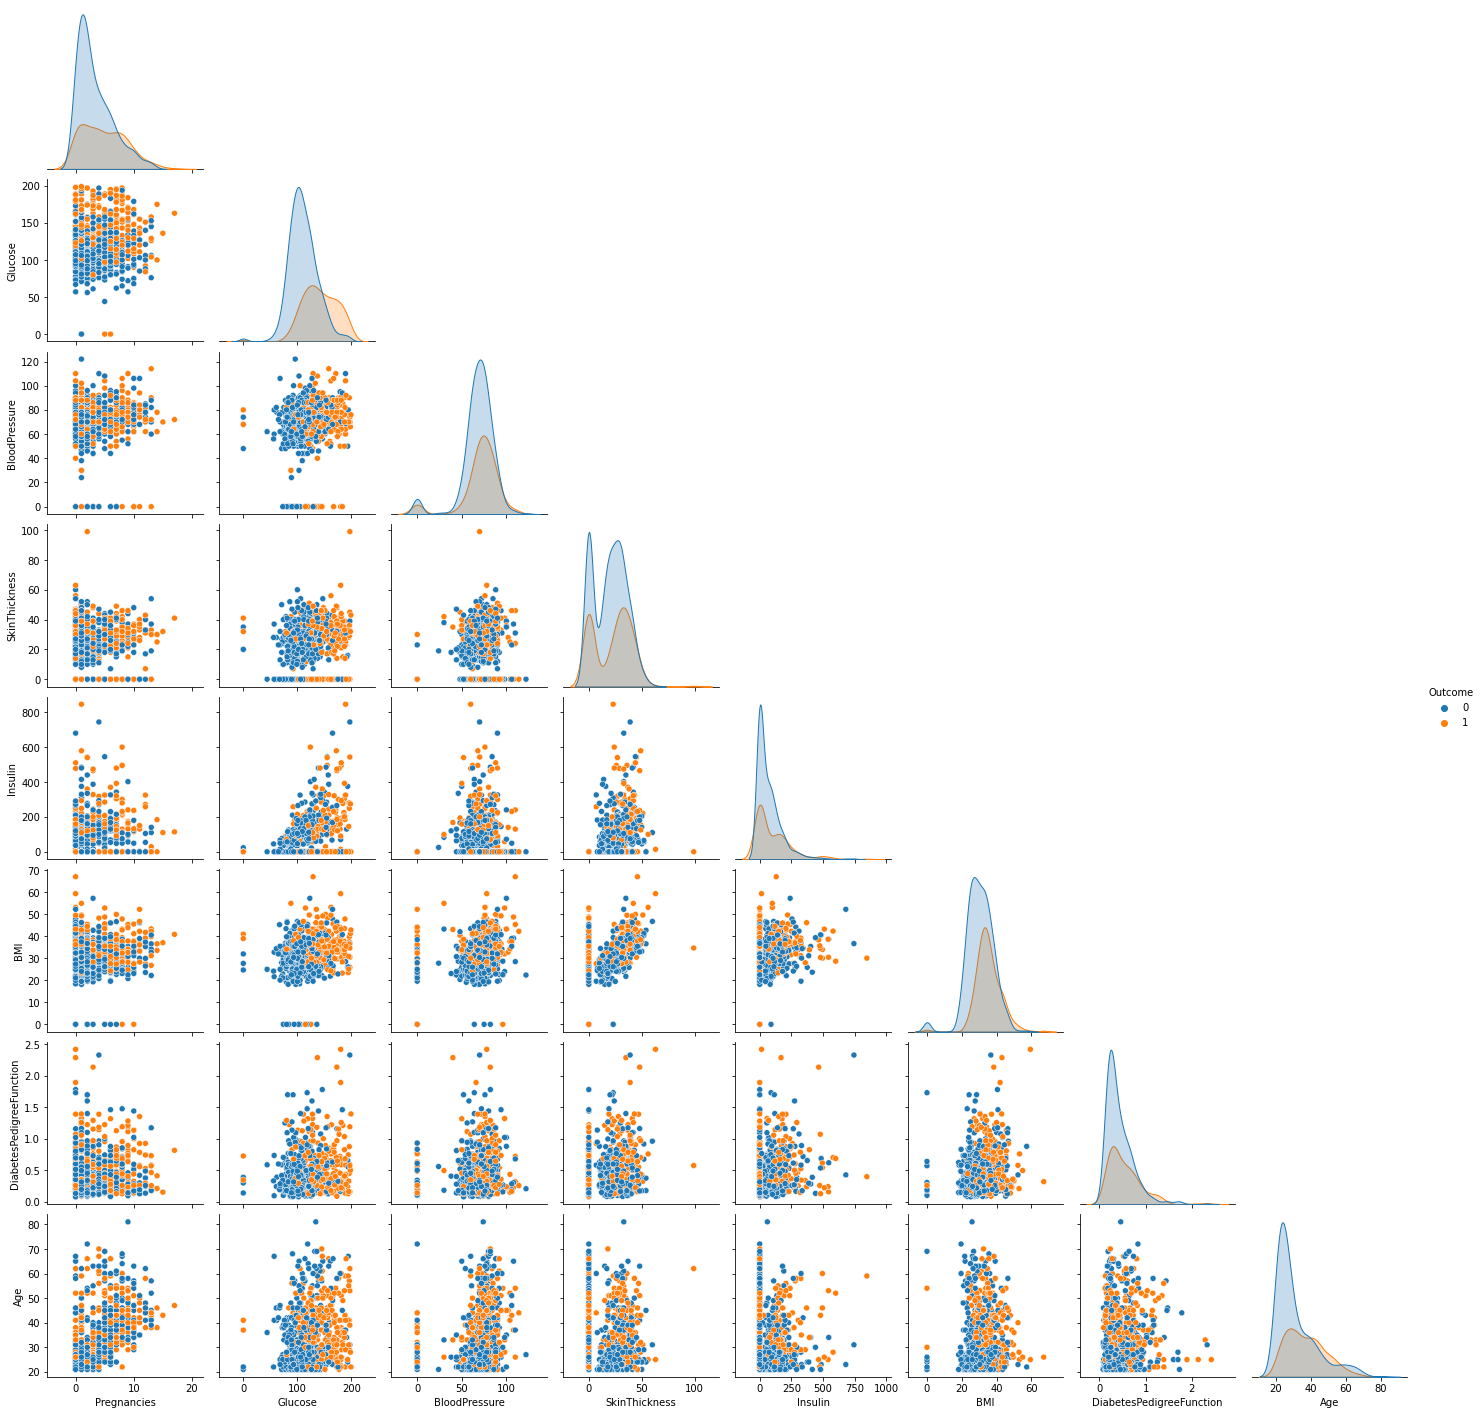

In [ ]:
# As variáveis não são "tão facilmente" separáveis
sns.pairplot(df, hue="Outcome", corner=True);

In [ ]:
# Criando e treinando o primeiro modelo

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = df.drop(columns='Outcome')
y = df['Outcome']

logit = LogisticRegression(max_iter=200)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

logit.fit(X_train, y_train)

y_pred = logit.predict(X_test)  

In [ ]:
#Intercepto
logit.intercept_

array([-9.43227002])

In [ ]:
#Coeficientes
logit.coef_

array([[ 0.05779149,  0.0359088 , -0.01085999, -0.00140653, -0.00098519,
         0.10907333,  0.37416395,  0.03600193]])

2. Após ter treinado o modelo, realize a sua avaliação com as ferramentas que foram apresentadas nas aulas.

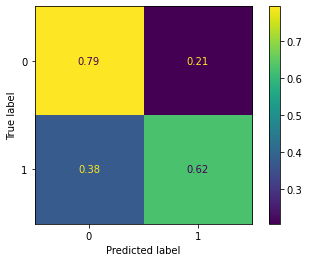

In [ ]:
#ConfusionMatrixDisplay normalize
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test,y_pred,normalize='true');

In [ ]:
# Predições do treino

from sklearn.metrics import classification_report

y_pred_train = logit.predict(X_train)
model1_train_metrics = classification_report(y_train,y_pred_train)

print(model1_train_metrics)

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       349
           1       0.74      0.59      0.65       188

    accuracy                           0.78       537
   macro avg       0.77      0.74      0.75       537
weighted avg       0.78      0.78      0.78       537



In [ ]:
# Predições do teste

model1_test_metrics = classification_report(y_test,y_pred)
print(model1_test_metrics)

              precision    recall  f1-score   support

           0       0.80      0.79      0.80       151
           1       0.62      0.62      0.62        80

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231



In [ ]:
from sklearn.metrics import roc_auc_score

probas = logit.predict_proba(X_test)
y_proba_1 = probas[:,1]
roc_auc_score(y_test, y_proba_1)

0.7966887417218543

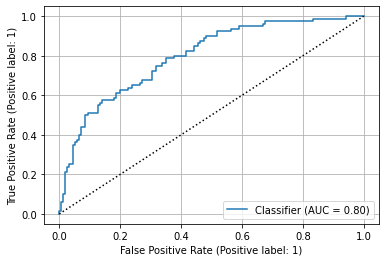

In [ ]:
#RocCurveDisplay
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(y_test, y_proba_1)

x = np.linspace(0, 1, 100)
y = x
plt.plot(x, y, ls=":", color="black")
plt.grid()

plt.show()

In [ ]:
# Podemos ver que o modelo acerta mais para o valor 0 do que para o valor 1 possivelmente
# devido ao desbalanceamento do target e as métricas de treino e teste não estão discrepantes,
# indicando que não houve overfit

3. O cutoff default (0.5) retorna a maior acurácia? Qual é o cutoff que retorna o mesmo valor para o precision e o recall? Qual é esse valor?

              precision    recall  f1-score   support

           0       0.78      0.87      0.82       151
           1       0.69      0.55      0.61        80

    accuracy                           0.76       231
   macro avg       0.74      0.71      0.72       231
weighted avg       0.75      0.76      0.75       231



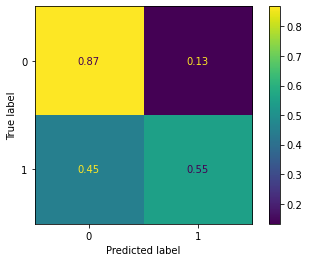

In [ ]:
# Ajustando o cutoff para 0.6 obtemos a maior acurácia

probas = logit.predict_proba(X_test)
y_proba_1 = probas[:,1]

cutoff = 0.6

y_pred_proba = np.where(y_proba_1 >= cutoff, 1, 0)

print(classification_report(y_test,y_pred_proba))

ConfusionMatrixDisplay.from_predictions(y_test,y_pred_proba,normalize='true');

In [ ]:
# Identificando o cutoff onde os valores de precision e recall são iguais (cutoff = 0.511963)

from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba_1)

precisions_recalls = pd.DataFrame(data={'precisions':precisions[:-1], 
                                        'recalls':recalls[:-1], 'thresholds':thresholds})

precisions_recalls[precisions_recalls['precisions']==precisions_recalls['recalls']]

,precisions,recalls,thresholds
142,0.625,0.625,0.511963


4. Crie um modelo de Regressão logistica para o mesmo dataset utilizando polynomial features com degree=2. Avalie o modelo e compare com o resultado do modelo anterior.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures(degree=2, include_bias=False)
pf.fit(X_train)

X_train = pf.transform(X_train)
X_test = pf.transform(X_test)

logit = LogisticRegression(max_iter=10000, solver='sag')
logit.fit(X_train, y_train)

y_pred = logit.predict(X_test)

In [ ]:
#Intercepto
logit.intercept_

array([-1.72944676e-06])

In [ ]:
#Coeficientes
logit.coef_

array([[-1.14267599e-06, -1.08339728e-04, -5.42508282e-05,
        -1.72030636e-05, -6.29668899e-05, -2.62586805e-05,
        -3.65256948e-07, -2.61123408e-05,  1.81081203e-05,
         1.06318276e-04,  1.36724960e-04,  5.86873082e-05,
         8.80086555e-05,  5.80753603e-05,  1.09876054e-06,
         3.10476059e-05,  9.54583488e-05,  8.75836132e-05,
        -8.49164127e-05, -6.47586290e-05,  1.87480059e-05,
         2.74411732e-06, -2.02533686e-04, -5.25821076e-04,
        -6.50842135e-05,  5.06509550e-06,  9.14516866e-05,
         3.70298631e-06,  3.29592410e-04, -2.23943914e-05,
         2.09180912e-04,  9.14426375e-06,  6.97272363e-06,
         3.49404046e-05,  1.67870800e-06, -1.48341570e-04,
        -2.46878304e-05,  2.25043205e-04,  4.96800354e-05,
         3.49548156e-06,  7.01100872e-05, -3.78917766e-08,
        -6.21005305e-07, -8.23296036e-05]])

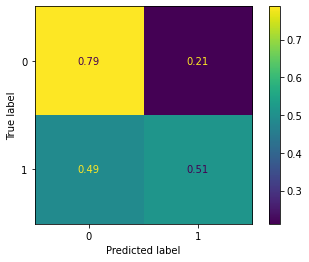

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred,normalize='true');

In [ ]:
# Predições do treino

from sklearn.metrics import classification_report

y_pred_train = logit.predict(X_train)
model2_train_metrics = classification_report(y_train,y_pred_train)

print(model2_train_metrics)

              precision    recall  f1-score   support

           0       0.75      0.80      0.77       349
           1       0.58      0.50      0.54       188

    accuracy                           0.70       537
   macro avg       0.66      0.65      0.66       537
weighted avg       0.69      0.70      0.69       537



In [ ]:
# Predições do teste

model2_test_metrics = classification_report(y_test,y_pred)
print(model2_test_metrics)

# Podemos ver que o modelo acerta mais para o valor 0 do que para o valor 1 possivelmente
# devido ao desbalanceamento do target

              precision    recall  f1-score   support

           0       0.75      0.79      0.77       151
           1       0.56      0.51      0.54        80

    accuracy                           0.69       231
   macro avg       0.66      0.65      0.65       231
weighted avg       0.69      0.69      0.69       231



In [ ]:
probas = logit.predict_proba(X_test)
y_proba_1 = probas[:,1]
roc_auc_score(y_test, y_proba_1)

0.685182119205298

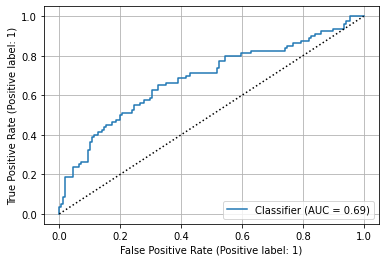

In [ ]:
#RocCurveDisplay
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(y_test, y_proba_1)

x = np.linspace(0, 1, 100)
y = x
plt.plot(x, y, ls=":", color="black")
plt.grid()
plt.show()

### Comparando os modelos:

In [ ]:
print('Predições do treino do modelo 1')
print()
print(model1_train_metrics)
print()
print('Predições do treino do modelo 2')
print()
print(model2_train_metrics)

Predições do treino do modelo 1



NameError: ignored

In [ ]:
# Notamos que o treino se ajustou melhor ao primeiro modelo (com maior acurácia e f1-score)

In [ ]:
print('Predições do teste do modelo 1')
print()
print(model1_test_metrics)
print()
print('Predições do teste do modelo 2')
print()
print(model2_test_metrics)

In [ ]:
# Notamos novamente que o primeiro modelo de saiu melhor

In [ ]:
# Primeiro modelo com ROC-AUC de 0.80 x 0.69 no segundo modelo

In [ ]:
# Primeiro modelo levou o troféu!!

Comentários:

* Bom EDA com bons raciocínios.
* Uso correto dos modelos e ótimo raciocínio dos resultados
* Utilizou corretamente a curva ROC e os calculos com diferentes cutoofs. Parabéns!